<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color=b><font size=6> Ingeniería Financiera </font> <br> <br>

<center><font color=b><font size=5> ITE1731 - Microestructura y Sistemas de Trading </font> <br> <br> <br>

<center><font color= b><font size=5> I.F. Patricio Díaz </font> <br> <br>

<center><font color=b><font size=5> I.F. Sofía García </font> <br> <br>
    
<center><font color=b><font size=5> I.F. Marta Martínez </font> <br> <br>
    
<center><font color=b><font size=5> I.F. Kiara Puente </font> <br> <br>
   
<center> <font color= b> <font size = 4> Mayo 2021 </a> | <font color= b> <font size = 4> Repositorio: <a href='https://github.com/Sofiagarciaif/myst_proyecto_e2'>Link</a></font>

<br>

<center> <font color=orange > <font size = 7> PROYECTO  </font> <br> <br> <font color= b> <font size = 5> Sistemas de Trading </font>

# <font color= "brown"> <font size = 5> Abstract </font>

 <font size = 3> Este documento fue elaborado por Patricio Díaz, Sofía García,Marta Martínez Valero y Kiara Puente como un proyecto final para la materia de **Microestructura y Sistemas de Trading - ITE1731**, la cual es parte del curriculum de la licenciatura en Ingeniería Financiera, ofertada por la universidad **ITESO**. En el presente trabajo se plantea analizar el comunicado de un indicador económico como un evento que puede generar patrones temporales en las reacciones del precio de un activo financiero. Con estas reacciones del precio, se busca detectar patrones y utilizarlos para construir un sistema de trading. </font> 

<br>

# <font color= "brown" > <font size = 6> 0. Librerías y Dependencias </font>

<hr style="border:0.02in solid orange"> </hr>

# <font color= orange> <font size = 5> 0.1 Librerías </font> <font color= #555555>

Para correr este notebook es necesario tener instaladas y/o en el archivo _requirements.txt_ las siguientes librerías :

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0

In [1]:
import data as dt 
import visualizations as vs
import functions as fn 

# <font color= orange> <font size = 5> 0.2 Dependencias </font> <font color= #555555>

Para correr este notebook es necesario contar con los siguientes archivos y dependencias externas:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

<br>

# <font color= "brown"> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid orange"> </hr>

<br>

# <font color= brown> <font size = 6> 2. Objetivos </font>

<hr style="border:0.02in solid orange"> </hr>

<br>

# <font color= brown> <font size = 6> 3. Datos </font>

<hr style="border:0.02in solid orange"> </hr>

#### <font color= a05000 >IMPORTAMOS LOS DATOS DEL IPC (INDICE DE PRECIOS AL CONSUMIDOR) DESDE EL SERVIDOR DE YAHOO FINANCE 

In [2]:
D_IPC = dt.f_import_ipc("^MXX")

In [3]:
D_IPC.head(5)

,Close
Date,
2019-04-29,44277.24
2019-05-06,43382.35
2019-05-13,43445.62
2019-05-20,42617.60
2019-05-27,42749.16


In [4]:
D_IPC.tail(5)

,Close
Date,
2021-03-29,47246.26
2021-04-05,47627.67
2021-04-12,48726.98
2021-04-19,49091.09
2021-04-26,48009.72


# <font color= brown> <font size = 6> 4. Procesos </font>

<hr style="border:0.02in solid orange"> </hr>

#### <font color= a05000 > PRIMERO REALIZAMOS UNA GRÁFICA DEL HISTÓRICO DESCARGADO PREVIAMENTE DEL IPC, PARA VISUALIZAR LOS DATOS

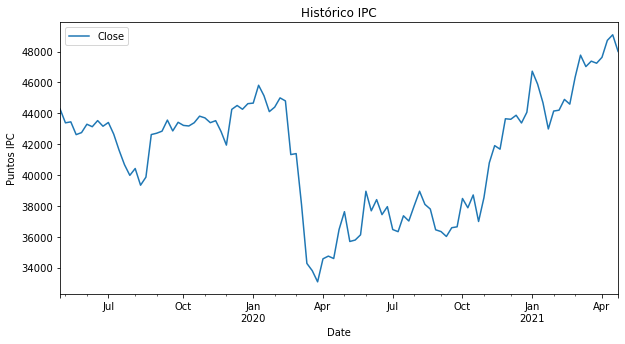

In [5]:
vs.f_grafica_hist(D_IPC)

#### <font color= a05000 > A LOS DATOS LE REALIZAMOS UNA AUTOCORRELACIÓN Y UNA CORRELACIÓN PARCIAL, EN LAS CUALES PODEMOS OBSERVAR QUE TIENE UN COMPONENTE DE AUTOCORRELACIÓN DE 5 Y UN COMPONENTE DE AUTOCORRELACIÓN PARCIAL IGUAL A 1

(<Figure size 432x288 with 1 Axes>, <Figure size 432x288 with 1 Axes>)

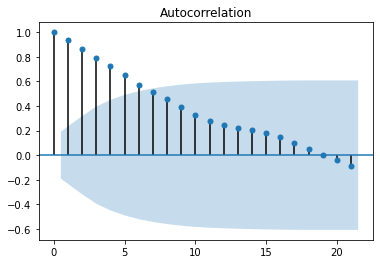

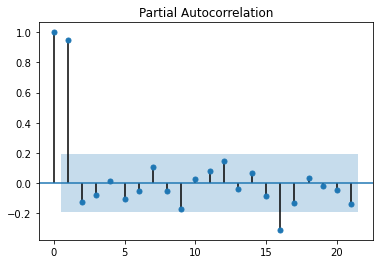

In [6]:
vs.f_autocorr(D_IPC)

#### <font color= a05000 > SE HIZO UNA PRUEBA DE HETEROCEDASTICIDAD PARA DETERMINAR .....

#### <font color= a05000 > SE REALIZA UNA PRUEBA DE NORMALIDAD A LOS DATOS PARA VER SI CONTAMOS CON UNA DISTRIBUCIÓN NORMAL Y PODEMOS VER YA QUE NOS DA UN P-VALUE MAYOR A 0.5 POR LO TANTO NO ES NORMAL 

In [7]:
vs.f_dist_normal(D_IPC)

No es normal


#### <font color= a05000 > VEMOS SI LA SERIE PRESENTA UNA ESCIONALIDAD

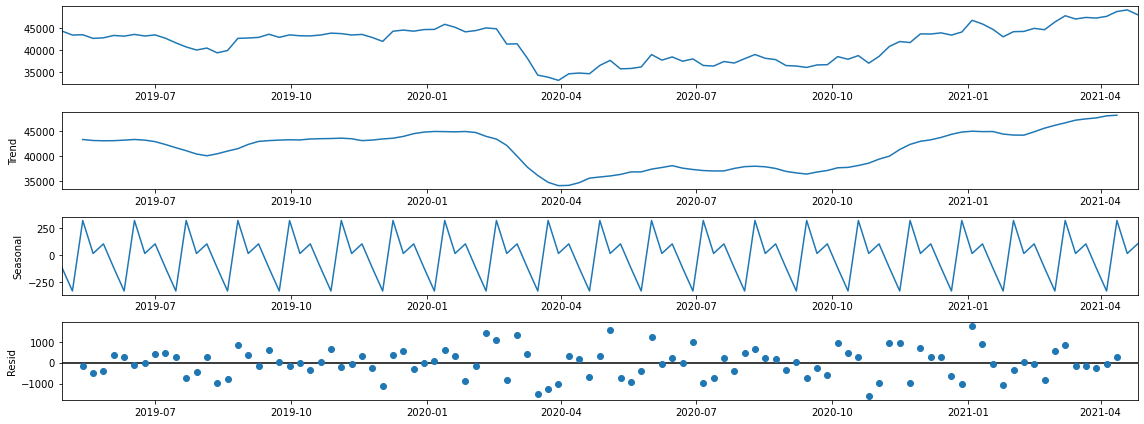

In [8]:
vs.f_estacionalidad(D_IPC)

#### <font color= a05000 > EVALUAMOS SI LA SERIE ES ESTACIONARIA MEDIANTE UN TEST DE DICKEY-FULLER

In [9]:
vs.f_estacionariedad(D_IPC)

No es estacionaria


#### <font color= a05000 > HICIMOS UNA GRÁFICA BOX PLOT PARA VER SI EXITÍAN DATOS ATÍPICOS Y DETECTARLOS

In [1]:
# aqui se incluye toda la secuencia de main.py.
# tomando los pasos en los que fuiste haciendo todos los calculos
# y poniendo cada uno como un subtitulo con markdown de nivel dos, así ## subtitulo de mi paso

<br>

# <font color= brown> <font size = 6> 5. Conclusiones </font>

<hr style="border:0.02in solid orange"> </hr>

In [2]:
# en esta seccion es opcional incluir algun codigo para mostrar
# visualmente algun concepto o hallazgo relevante como conclusion

In [3]:
# En esta sección es opcional incluir código para mostrar/visualizar
# los datos con los que se trabajó en el laboratorio

<br>